# Playing with `brd35`

* Motor set at 2.5Khz with pololu usual driver, M0 floating M1 high.
* Two sets of acquisitions, on `wirephantom`, with probe main screw parallel then perpendicular to the phantom board

In [1]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import numpy as np
import datetime

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6) # init FTDI device 
fpga.reload() # reload configuration
fpga.reset() # reset fpga

In [6]:
fpga.set_pulseform(initDelay=5, POn=16, PInter=16, Poff=5000)
gain = [int(250 + ((500-250)*x*x*x/32/32/32)) for x in range(32)]
gain[0] = 0
gain[1] = 50

In [15]:
fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=False)
now = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
file = fpga.save(nameFile = now+"_ndt")

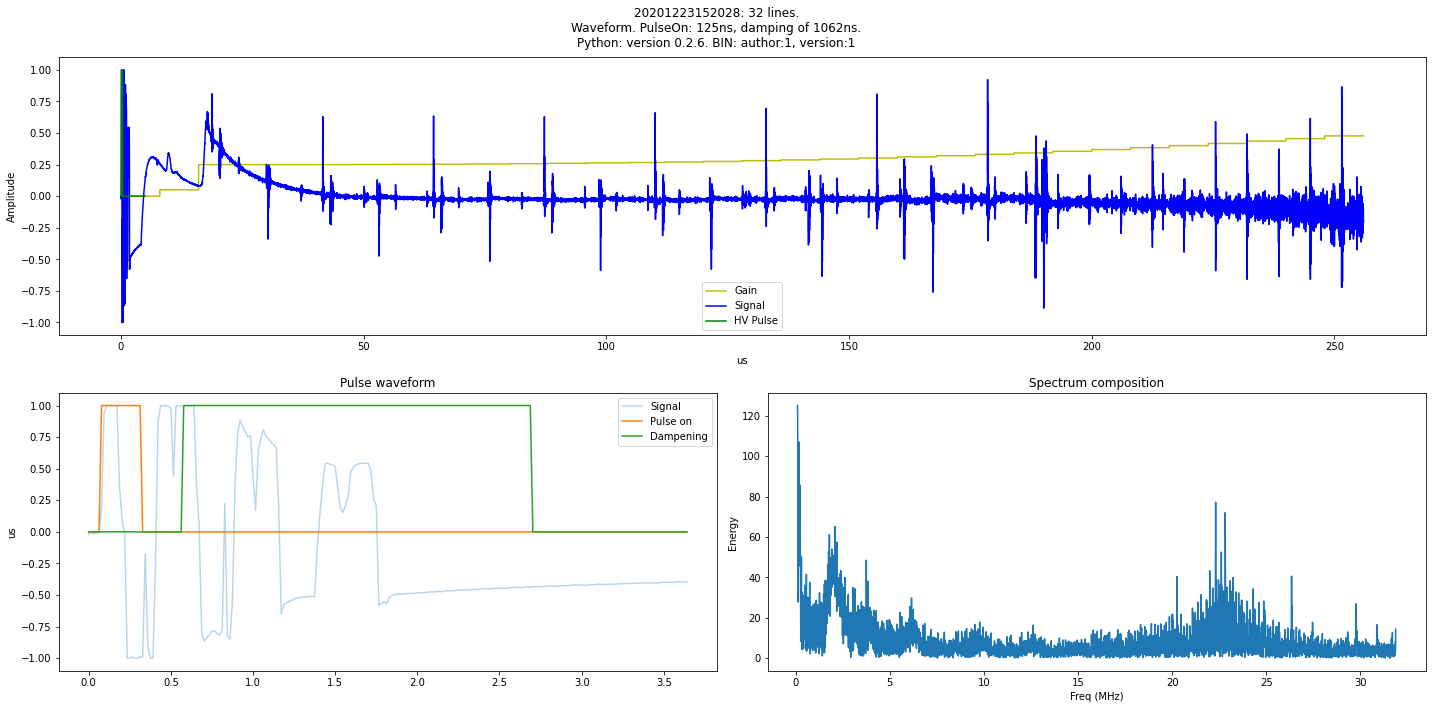

In [16]:
parallel = USB.FView() # Opens a viewing object
dataPR = parallel.readfile(file) # plots it

In [17]:
fpga.disconnect()